In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

In [2]:
output_folder=' '

In [3]:
# bus stop output containing delay and person load information
stopO = pd.read_csv(f'{output_folder}/busstop_info.csv',sep=',')
stopO=stopO[["stopinfo_id","stopinfo_busStop","stopinfo_started","stopinfo_arrivalDelay",
             "stopinfo_ended","stopinfo_delay","stopinfo_initialPersons",
             "stopinfo_loadedPersons","stopinfo_unloadedPersons",
             "stopinfo_lane","stopinfo_pos","stopinfo_parking"]]
stopO['route']=stopO['stopinfo_id'].str[5:8]
stopO['route']=stopO['route'].replace('_','', regex=True)
stopO['route']=stopO['route'].replace('t','', regex=True)
stopO['trip']=stopO['stopinfo_id'].str[-9:]
stopO=stopO.sort_values(["trip","stopinfo_started"])

#hourly number of people at each bus stop
stopO['hour']=stopO['stopinfo_ended']//3600
stopbyH = dict(tuple(stopO.groupby([stopO['hour']])))

In [4]:
def conv_time(ss):
    s = int(ss)
    time = str(datetime.timedelta(seconds=s))
    return time

In [5]:
stopO['time']=stopO['stopinfo_started'].map(conv_time)

In [6]:
stopO

,stopinfo_id,stopinfo_busStop,stopinfo_started,stopinfo_arrivalDelay,stopinfo_ended,stopinfo_delay,stopinfo_initialPersons,stopinfo_loadedPersons,stopinfo_unloadedPersons,stopinfo_lane,stopinfo_pos,stopinfo_parking,route,trip,hour,time
222,Route1_ALTON_PARK_block107_trip151657020,busStop_-9282_0_354,32119.0,262.0,32122.0,262.0,0,7,0,-9282_0,247.16,0,1A,151657020,8.0,8:55:19
223,Route1_ALTON_PARK_block107_trip151657020,busStop_2007_0_505,33855.0,1779.0,33858.0,1779.0,7,1,0,2007_0,310.46,0,1A,151657020,9.0,9:24:15
180,Route1_ALTON_PARK_block103_trip151682020,busStop_-2074_0_1351,34009.0,112.0,34012.0,112.0,0,3,0,-2074_0,56.80,0,1A,151682020,9.0,9:26:49
181,Route1_ALTON_PARK_block103_trip151682020,busStop_-1489_0_12,34977.0,1029.0,34980.0,1029.0,3,3,1,-1489_0,129.52,0,1A,151682020,9.0,9:42:57
182,Route1_ALTON_PARK_block103_trip151682020,busStop_gneE48_0_1555,35000.0,997.0,35003.0,997.0,5,1,0,gneE48_0,127.49,0,1A,151682020,9.0,9:43:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,Route4_EASTGATE_HAMILTON_PL_block409_trip15232...,busStop_1527_0_927,27589.0,6108.0,27593.0,6109.0,11,14,1,1527_0,189.95,0,4E,152324020,7.0,7:39:49
628,Route4_EASTGATE_HAMILTON_PL_block409_trip15232...,busStop_-1521_0_928,27637.0,6095.0,27640.0,6095.0,24,8,0,-1521_0,175.04,0,4E,152324020,7.0,7:40:37
629,Route4_EASTGATE_HAMILTON_PL_block409_trip15232...,busStop_-16481_0_930,27729.0,6140.0,27732.0,6140.0,32,0,0,-16481_0,136.57,0,4E,152324020,7.0,7:42:09
630,Route4_EASTGATE_HAMILTON_PL_block409_trip15232...,busStop_-16489_0_931,27869.0,6245.0,27872.0,6245.0,32,0,0,-16489_0,283.41,0,4E,152324020,7.0,7:44:29


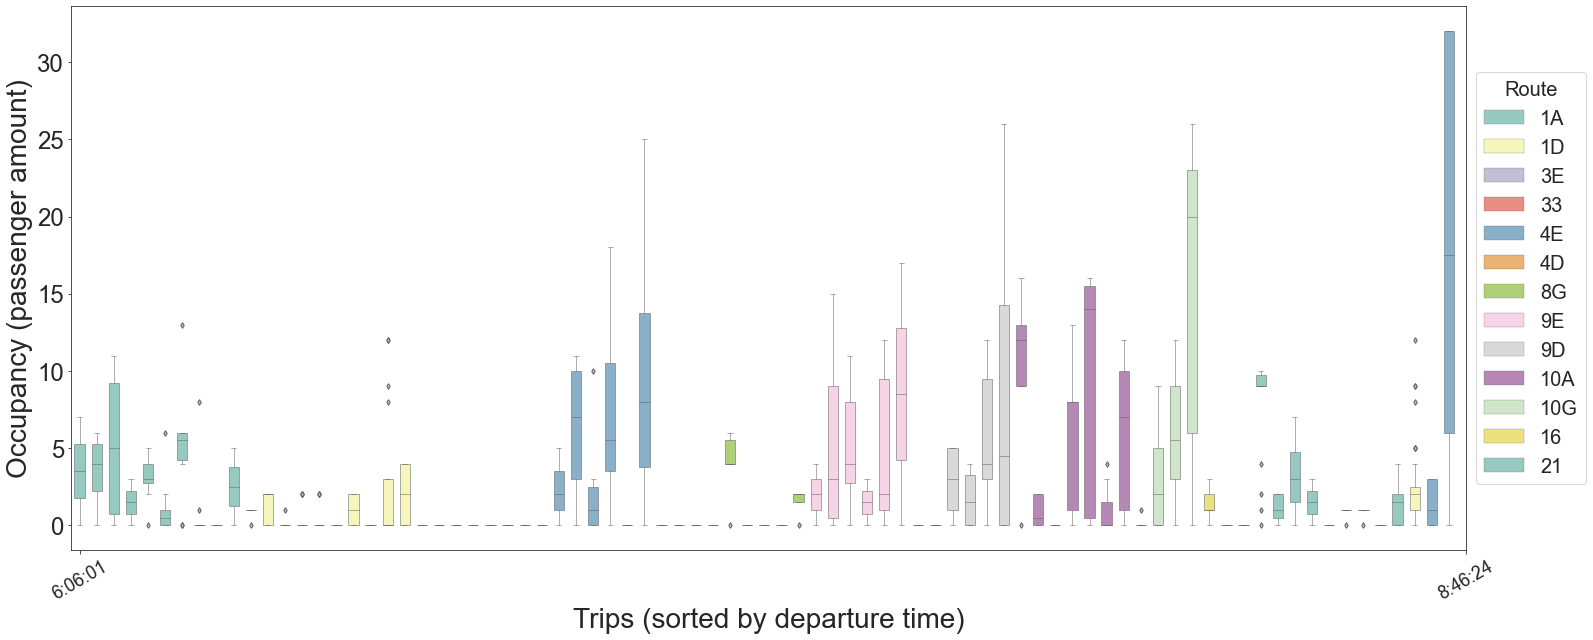

In [8]:
#boxplot of occupancy of each bus by trip
fig1st, oc = plt.subplots(figsize=(25, 10))
sns.set_style("ticks")
sns.boxplot(x = 'trip', y = 'stopinfo_initialPersons', data = stopO, hue="route",
            linewidth=0.5, palette="Set3",
            flierprops = dict(markerfacecolor='0.75', markersize=4,linestyle='none'),
            dodge =False,width=0.6)
oc.set_xlabel('Trips (sorted by departure time)',fontsize=28)
oc.set_ylabel('Occupancy (passenger amount)',fontsize=28)
plt.setp(oc.get_xticklabels(), fontsize = 18)
plt.setp(oc.get_yticklabels(), fontsize = 24)
plt.xticks(rotation = 30)
oc.set_xticks([0,len(pd.unique(stopO['trip']))])
oc.set_xticklabels([stopO['time'][0],stopO['time'][stopO.shape[1]]])
oc.legend(fontsize=20,title="Route", title_fontsize = 20,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()